In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
from random import shuffle
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
#from keras.optimizers import RMSprop,Adam
import glob
from PIL import Image
from sklearn.preprocessing import StandardScaler

In [15]:
image_dir=Path('C:/Users/Dell/Desktop/Dandelions/archive (2)/Images')

In [21]:
JPG_Path = list(image_dir.glob(r"*/*.jpg"))
JPG_Path = JPG_Path[0:250] + JPG_Path[650:800]
# for i in JPG_Path:
#     if '/other/' in i:
#         labels.append('other')
#     else:
#         labels.append('dandelion')
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],JPG_Path))
print(len(labels))

400


In [22]:
df = pd.DataFrame({
    'image':JPG_Path,
    'labels':labels
})
# df.head()
print(df.shape)
print(df['labels'].value_counts())
df=df.sample(frac=1).reset_index(drop=True)
df.head()
#df['image','labels']=df['image','labels'].astype('str')

(400, 2)
dandelion    250
other        150
Name: labels, dtype: int64


,image,labels
0,C:\Users\Dell\Desktop\Dandelions\archive (2)\I...,dandelion
1,C:\Users\Dell\Desktop\Dandelions\archive (2)\I...,other
2,C:\Users\Dell\Desktop\Dandelions\archive (2)\I...,dandelion
3,C:\Users\Dell\Desktop\Dandelions\archive (2)\I...,dandelion
4,C:\Users\Dell\Desktop\Dandelions\archive (2)\I...,dandelion


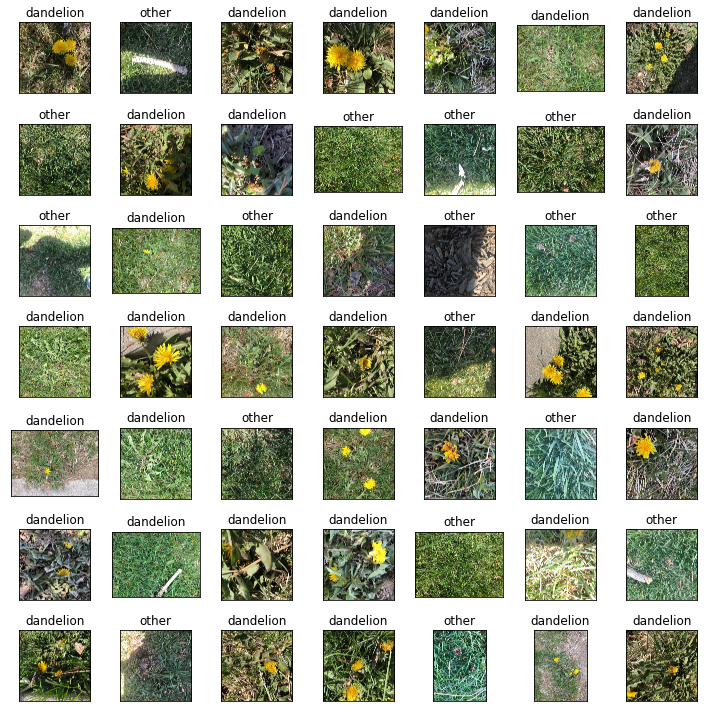

In [23]:
fig, axes = plt.subplots(nrows=7, ncols=7, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df["image"][i]))
    ax.set_title(df["labels"][i])
plt.tight_layout()
plt.show()

In [24]:
train_data,test_data=train_test_split(df,random_state=12,test_size=0.2,shuffle=True)
train_data=train_data.astype('str')
test_data=test_data.astype('str')
print(train_data.shape,test_data.shape,train_data.dtypes)

(320, 2) (80, 2) image     object
labels    object
dtype: object


In [25]:
img_generator=ImageDataGenerator(rescale=1./255)
Train_Set = img_generator.flow_from_dataframe(dataframe=train_data,
                                              x_col="image",
                                              y_col="labels",
                                              color_mode="grayscale",
                                              class_mode="binary",
                                              subset="training",
                                              batch_size=10,
                                              target_size=(1000,1000))
Test_Set = img_generator.flow_from_dataframe(dataframe=test_data,
                                              x_col="image",
                                              y_col="labels",
                                              color_mode="grayscale",
                                              class_mode="binary",
                                              batch_size=10,
                                              target_size=(1000,1000))

Found 320 validated image filenames belonging to 2 classes.
Found 80 validated image filenames belonging to 2 classes.


In [26]:
for data_batch,label_batch in Test_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.reshape((-1,1)))
    break
for data_batch,label_batch in Train_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break
    
# Test_Set[0][1].reshape(-1,1)
# print(Test_Set[0][1].shape)

DATA SHAPE:  (10, 1000, 1000, 1)
LABEL SHAPE:  [[0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]]
DATA SHAPE:  (10, 1000, 1000, 1)
LABEL SHAPE:  (10,)


In [27]:
####Model Building
Model=Sequential()

Model.add(Conv2D(32,(3,3),activation="relu",input_shape=(1000,1000,1),strides=(2,2)
                ))
Model.add(MaxPooling2D((2,2)))
Model.add(Dropout(0.2))

Model.add(Conv2D(64,(3,3),activation="relu",strides=(2,2)
                ))
Model.add(MaxPooling2D((2,2)))
Model.add(Dropout(0.2))

Model.add(Conv2D(128,(3,3),activation="relu",strides=(2,2)
                ))
Model.add(MaxPooling2D((2,2)))
Model.add(Dropout(0.2))

Model.add(Conv2D(128,(3,3),activation="relu",strides=(2,2)
                ))
Model.add(MaxPooling2D((2,2)))
Model.add(Dropout(0.2))

Model.add(Flatten())
Model.add(Dropout(0.5))
Model.add(Dense(256,activation="relu"))
Model.add(Dense(1,activation="sigmoid"))

In [28]:
Model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=tf.keras.losses.BinaryCrossentropy(),metrics=["accuracy"])

In [29]:
Final_Model=Model.fit(Train_Set,epochs=30)

Epoch 1/30
32/32 [==============================] - 85s 3s/step - loss: 0.6899 - accuracy: 0.5875
Epoch 2/30
32/32 [==============================] - 74s 2s/step - loss: 0.6785 - accuracy: 0.6125
Epoch 3/30
32/32 [==============================] - 70s 2s/step - loss: 0.6667 - accuracy: 0.6187
Epoch 4/30
32/32 [==============================] - 70s 2s/step - loss: 0.6276 - accuracy: 0.6187
Epoch 5/30
32/32 [==============================] - 70s 2s/step - loss: 0.4732 - accuracy: 0.7281
Epoch 6/30
32/32 [==============================] - 71s 2s/step - loss: 0.4460 - accuracy: 0.7594
Epoch 7/30
32/32 [==============================] - 71s 2s/step - loss: 0.4065 - accuracy: 0.8094
Epoch 8/30
32/32 [==============================] - 70s 2s/step - loss: 0.4006 - accuracy: 0.8219
Epoch 9/30
32/32 [==============================] - 71s 2s/step - loss: 0.3691 - accuracy: 0.8125
Epoch 10/30
32/32 [==============================] - 71s 2s/step - loss: 0.3443 - accuracy: 0.8344
Epoch 11/30
32/32 [

In [35]:
print(Model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 499, 499, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 249, 249, 32)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 249, 249, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 128)      

<AxesSubplot:>

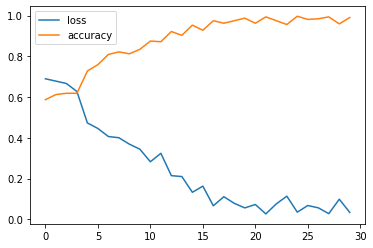

In [37]:
pd.DataFrame(Final_Model.history).plot()

In [38]:
Model.evaluate(Test_Set)

8/8 [==============================] - 18s 2s/step - loss: 0.0588 - accuracy: 0.9750


[0.05882106348872185, 0.9750000238418579]